# Ajustes lineales, no lineales y busqueda de mínimos y máximos

# `SciPy`

- `SciPy` es una biblioteca libre y de código abierto para Python. Se compone de herramientas y algoritmos matemáticos. Se creó a partir de la colección original de Travis Oliphant, que se componía de módulos de extensión para Python y fue lanzada en 1999 bajo el nombre de Multipack, llamada así por los paquetes netlib que reunían a ODEPACK, QUADPACK, y MINPACK.

- `SciPy` contiene módulos para optimización, álgebra lineal, integración, interpolación, funciones especiales, FFT, procesamiento de señales y de imagen, resolución de ODEs y otras tareas para la ciencia e ingeniería.

- `SciPy` se basa en el objeto de matriz NumPy y es parte del conjunto NumPy, que incluye herramientas como Matplotlib, Pandas y SymPy, y un conjunto en expansión de bibliotecas de computación científica. Este conjunto está dirigido al mismo tipo de usuarios que los de aplicaciones como MATLAB, GNU Octave, y Scilab. A veces también se hace referencia a este conjunto de herramientas y bibliotecas como SciPy.

https://www.scipy.org/index.html  
https://www.scipy.org/install.html  
pip install scipy  
sudo pip3 install sympy

## Ajuste de funciones generales - SciPy

Si queremos hacer un ajuste general, no necesariamente polinómico, debemos usar alguno de los métodos del paquete optimize, que contiene varios optimizadores locales y globales. El más común es leastsq que, al ser un optimizador, hay que definir previamente una función residuo que es la que realmente se va minimizar.
Para ello necesitamos el paquete `SciPy`.

http://webs.ucm.es/info/aocg/python/modulos_cientificos/scipy/index.html

Su organización se estructura en subpaquetes, que se pueden considerar especializados en dominios científicos determinados. Podemos encontrar estos paquetes, según la ayuda de `SciPy`:

* linalg – Algebra lineal
* signal – Procesamiento de señales
* stats – Funciones estadísticas
* special – Funciones especiales
* integrate – Integración
* interpolate – Herramientas de interpolación
* optimize – Herramientas de optimización
* fftpack – Algortimos de transformada de Fourier
* io – Entrada y salida de datos
* lib.lapack – Wrappers a la librería LAPACK
* lib.blas – Wrappers a la librería BLAS
* lib – Wrappers a librerías externas
* sparse – Matrices sparse
* misc – otras utilidades
* cluster – Vector Quantization / Kmeans
* maxentropy – Ajuste a modelos con máxima entropía

Los subpaquetes de Scipy se tienen que importar de forma separada. Por ejemplo:

```Python
from scipy import linalg, optimize.
# Tanto Scipy como Numpy tienen versiones de su documentación en pdf y html en http://docs.scipy.org/. También se puede obtener ayuda de las funciones y de los módulos mediante
sp.info(funcion)
```
como por ejemplo
```Python
import scipy as sp               # Importamos el módulo scipy como el alias sp
sp.info(sp.optimize.fmin)        # Consultamos la información de la función fmin.
```
Otra forma de buscar información es con el comando source, que lista el código de esa función,
```Python
sp.source(sp.linspace)
```

##  Ajuste de una función usando `scipy.optimize  curve_fit`

In [1]:

"""
Descripción: Ejemplo de cómo usar la función curve_fit perteneciente a scipy.optimize para 
ajustar una función a una curva.
"""
import numpy as np
import matplotlib.pyplot as plt             # Importamos matplotlib.pyplot como el alias plt.
from scipy.optimize import curve_fit        # Importamos curve_fit de scipy.optimize
import scipy as sp                          # Importamos scipy como el alias sp

Vamos a recrear el ejemplo anterior, resuelto con `NumPy` y compararemos los resultados del ajuste.  

In [2]:
n = 50                                              # haremos 50 datos con ruido aleatorio
jitter_amp = 4.0                                    # esto es la amplitud del ruido
x = np.linspace(0,10,n)                             # generamos la variable x
jitter = jitter_amp * (np.random.random(n)-0.5)     # calculamos el ruido para cada dato
y = x + jitter

Graficamos

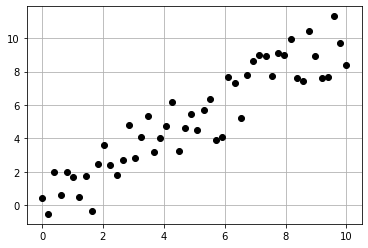

In [3]:
plt.plot(x,y,'ok')
plt.grid()

- Ahora definamos una función de ajuste

Rehagamos el ajuste usando NumPy a los efectos de comparar los coeficientes obtenidos

In [4]:
a = np.polyfit(x,y,1)    #  el número 1 significa que usaremos un polin de 1er grado
a

array([0.97570301, 0.39393368])

In [5]:
def fit_func(t,m,b):
    return m*t+b

Y utilizamos la función `optimize.curve_fit`

In [6]:
p, cov = curve_fit(fit_func,x,y)
p, a # observemos que a es el resulato obtenido con anterioridad

(array([0.97570301, 0.39393368]), array([0.97570301, 0.39393368]))

Esta es la matriz de covariancia

In [7]:
cov

array([[ 0.0032506 , -0.01625299],
       [-0.01625299,  0.10945891]])

Ahora grafiquemos los resultados

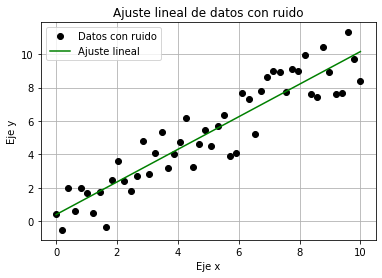

In [8]:
t = np.linspace(0,10,n)
plt.plot(x,y,'ok')
plt.plot(t, p[0]*t+p[1],'g') # Aqui utilizamos los resultados
plt.grid()
plt.xlabel('Eje x')
plt.ylabel('Eje y')
plt.title('Ajuste lineal de datos con ruido')
plt.legend(['Datos con ruido', 'Ajuste lineal'], loc = 0)

Para no usar datos experimentales reales, para ello definimos una función que a partir de unos coeficientes inventados crea un array y al que añadimos un array de numeros aleatorios de la misma dimension que x mediante sp.random.normal que ponderamos con el factor k.

Para este ejemplo imaginaremos un experimento, cuyos resultados en función del tiempo, vienen dados por la función,

$$experimen = e^{\left(\frac{-bx^{2}}{2d^{2}}\right)}+cx$$

siendo a, b, c y d coeficientes desconocidos que el investigador saber para mejorar sus publicaciones.  

In [9]:
# definimos la función
def mi_funcion(x, a, b, c, d):
  """
  * (x, float, float, float, float ) --> (mismo_tipo_x)
  * Descripción: definición de una función general.
  * Entradas:
  - x = variable.
  - a, b, c, d = Coeficientes de la función.
  * Salidas:
  - a * np.exp(-b*x**2/(2*d**2)) + c * x
  * Test:
  >>> y = mi_funcion(5, 2.5, 1.3, 0.5,1)
  2.50000021911
  """

  return a * np.exp(-b*x**2/(2*d**2)) + c * x

In [10]:
# Añadimos ruido a la función

x = np.linspace(0, 5,30)

a, b, c, d = 2.5, 1.3, 0.5, 1
y = mi_funcion(x, a, b, c, d)

def ruido(x,y,k):
    """
    * (array, array, float) --> (array)
    * Descripción: definición de una función general que mete ruido a la función creada.
    De esta forma simulamos puntos experimentales.
    * Entradas:
    - x, y = arrays dimensionales.
    * Salidas:
    - yn = array dimensional con los datos experimentales simulados
     """

    yn = y + k * np.random.normal(size = len(x))
    return yn
# Aqui `len(x)` nos dice cual es la longitud del vector con los datos, asi generamos otros 
# vector con el ruido que le sumamos a los datos medidos (simulados)

Ajustamos nuestros datos experimentales recien creados a la función inicial mediante curve_fit. Los resultados los vamos a almacener en coeficientes_optimizados y covarianza_estimada que es la covarianza de los coeficientes optimizados,

In [11]:
# Ajustamos los datos experimentales a nuestra función y los almacenamos
coeficientes_optimizados, covarianza_estimada = curve_fit(mi_funcion, x, y)

por último presentamos en pantalla,

In [12]:
# Mostramos los coeficientes calculados
# y = mi_funcion(x, 2.5, 1.3, 0.5, 1)
print('Coeficientes optimizados: ', coeficientes_optimizados)
print('Covarianza estimada: ', covarianza_estimada)

Coeficientes optimizados:  [  2.5        247.41839953   0.5         13.79571839]
Covarianza estimada:  [[ 4.60597051e-33 -6.46166484e-24  1.01869773e-34 -1.80146903e-25]
 [-6.46166484e-24  1.56839159e-13 -1.78717021e-24  4.37257068e-15]
 [ 1.01869771e-34 -1.78717016e-24  8.62890684e-35 -4.98251079e-26]
 [-1.80146903e-25  4.37257068e-15 -4.98251099e-26  1.21904341e-16]]


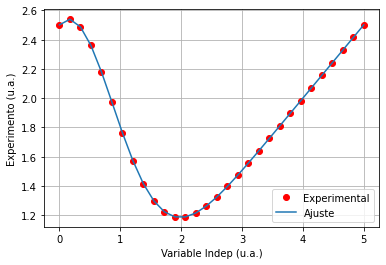

In [13]:
# Creamos la figura
plt.figure()

# Dibujamos los datos experimentales.
plt.plot(x,y,'ro', label = 'Experimental')

# Dibujamos
plt.plot(x,mi_funcion(x,coeficientes_optimizados[0],coeficientes_optimizados[1],coeficientes_optimizados[2], coeficientes_optimizados[3]), label = 'Ajuste')

# Añadimos la leyenda
plt.legend()

plt.xlabel('Variable Indep (u.a.)')
plt.ylabel('Experimento (u.a.)')
plt.grid()
#plt.grid(b=True, color='g')
# Mostramos la gráfica
plt.show()

## Ajuste por cuadrados mínimos usando `scipy.optimize  leastsq`

In [14]:
# import numpy as np
# from matplotlib import pyplot as plt
from scipy.optimize import leastsq
# %matplotlib inline
# Datos de laboratorio
datos_y = np.array([ 2.9, 6.1, 10.9, 12.8, 19.2])
datos_x = np.array([ 1.0, 2.0, 3.0, 4.0, 5.0])

In [15]:
# Función para calcular los residuos, donde
# se calcula (datos - modelo)
def residuos(p, y, x):
    error  = y - (p[0]*x + p[1])
    return error

In [16]:
# Parámetros iniciales estimados
# y = p0[0]*x  + p0[0]

p0 = [2.0, 0.0]

In [17]:
# Hacemos  el ajuste por minimos cuadrados con leastsq(). El primer parámetro
# es la funcion de residuos, luego los parámetro iniciales y una tupla con los
# argumentos de la funcion de residuos, en este caso, datos_y y datos_x en
# ese orden, porque así se definió la función de error
ajuste = leastsq(residuos, p0, args=(datos_y, datos_x))

In [18]:
# El resultado es una lista, cuyo primer elemento es otra
# lista con los parámetros del ajuste
print(ajuste[0])
print(ajuste[0][0])
# array([ 3.93, -1.41])

[ 3.93 -1.41]
3.9300000000042097


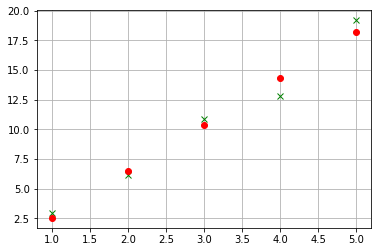

In [19]:
plt.plot(datos_x,datos_y,'xg', label = 'Datos de laboratorio')
yres = ajuste[0][0] * datos_x  + ajuste[0][1]
plt.plot(datos_x,yres,'or', label = 'Datos ajustados')
plt.grid()

Veamos otro ejemplo para ajustar una función seno:

In [20]:
from scipy import random

In [21]:
# Generamos unos datos artificiales para hacer el ejemplo
# A datos_y se le añade "ruido" que simula error de
# medida, añadiendole un valor aleatorio
datos_x = np.arange(0, 0.1, 0.003)
A, k, theta = 10.0, 33.3, np.pi/5.0  # Definimos tres datos
y_real = A * np.sin(2 * np.pi * k * datos_x + theta)   # Calculamos y
datos_y = y_real + 2 * random.randn(len(datos_x))   # Les metemos ruido para que parezcan reales

In [22]:
# Ahora se trata de ajustar estos datos una función
# modelo tipo senoidal A*sin(2*pi*k*x + theta)

# Defino la funcion de residuos
def residuos(p, y, x):
    A, k, theta = p
    error = y - A * np.sin(2 * np.pi * k * x + theta)
    return error

In [23]:
# Parámetros iniciales
# y = p[0]*np.sin(2*np.pi*p[1]*x + p[2])
# Si estos se alejan mucho del valor real
# la solución no convergerá
p0 = [8.0, 40.0, np.pi/3]

In [24]:
# hacemos  el ajuste por minimos cuadrados
ajuste = leastsq(residuos, p0, args=(datos_y, datos_x))

# El resultado es una lista, cuyo primer elemento es otra
# lista con los parámetros del ajuste.
print(ajuste[0])
# array([ -9.787095  ,  32.91201348,  -2.3390355 ]

[-9.58048532 33.00169543 -2.42373489]


In [25]:
# Defino la funcion modelo, para representarla gráficamente
def funcion(x, p):
    return p[0] * np.sin(2 * np.pi * p[1] * x + p[2])

In [26]:
# genero datos a partir del modelo para representarlo
x1 = np.arange(0, datos_x.max(), 0.001)  # array con muchos puntos de x
y1 = funcion(x1, ajuste[0])           # valor de la funcion modelo en los x

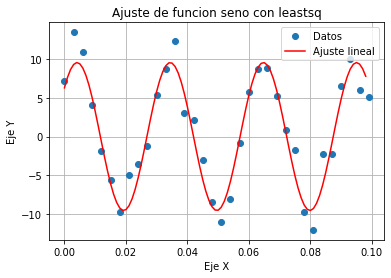

In [27]:
# Ahora muestro los datos y el ajuste gráficamente
plt.plot(datos_x, datos_y, 'o')  # datos

plt.plot(x1, y1, 'r-')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Ajuste de funcion seno con leastsq')
plt.legend(('Datos', 'Ajuste lineal'))
plt.grid()
plt.show()

Este ejemplo es bastante elaborado porque hemos usado un optimizador general para hacer un ajuste, pero podemos usar curve_fit() para ahorrarnos la función residuo.

La anterior es una manera artesanal de hacer el ajuste, al construir la función de error. Para un ajuste de datos

## Búsqueda de minimos de una función

En `Scipy` las funciones universales (suma, resta, division, etc.) se han alterado para no producir errores de coma flotante cuando se encuentran errores; por ejemplo se devuelve NaN e Inf en los arrays en lugar de errores. Para ayudar a la detección de estos eventos, hay disponibles varias funciones como `sp.isnan`, `sp.isinfinite`,  `sp.isinf`. Además se han modificado algunas funciones (log, sqrt, funciones trigonometricas inversas) para devolver valores complejos en lugar de NaN (por ejemplo sp.sqrt(-1) devuelve 1j).

Dada la gran cantidad de módulos contenidos en Scipy, en esta sección nos limitaremos en dar ejemplos de algunos de ellos recordando que el camino ideal para el aprendizaje es la lectura de los manuales oficiales.

### fmin de scipy.optimize

Minimiza una función usando el algoritmo downx simplex.

Este algoritmo solo usa valores de función, no derivados o segundas derivadas.

A continuación cargaremos los módulos que vamos a necesitar,

In [28]:
from scipy.optimize import fmin # Importamos fmin de scipy.optimize

Definimos el sistema físico de unidades y la función sinc(x) en python.

In [29]:
# Definimos el sistema físico de unidades
um = 1      # micras    
mm = 100 * um       # milímetros

# Definimos los parámetros físicos
anchura_rendija = 40
longitud_onda = 0.630 * um

# Definimos la función "sinc".
def sinc(x):
  """
  * (float) --> (float)
  * Descripción: Función sinc de un número dado (sen(x)/x).
  * Entradas:
  - x = float.
  * Salidas:
  - funcion_sinc = seno(float) / float
  * Test:
  >>> print(sinc(5))
  3.46751168769e-06
  """
  # Definimos la función sinc normalizada.
  funcion_sinc = (np.sin(np.pi*anchura_rendija*np.sin(x)/longitud_onda)/(np.pi*anchura_rendija*np.sin(x)/longitud_onda))**2
  return funcion_sinc          # La devolvemos.

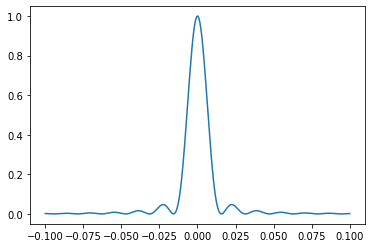

In [30]:
# Podemos representar simplemente creando los arrays dimensionales y cargando matplotlib
x = np.linspace(-0.1,0.1,300)
y = sinc(x)

# Creamos la figura
plt.figure()

#Representamos la gráfica
plt.plot(x,y)

plt.show()

la función fmin necesita de valores iniciales a modo de semilla para comenzar las iteraciones. En nuestro caso hemos elegido como valor 0.001,

In [31]:
# fmin necesita una semilla así que se la proporcionamos.
semilla = 0.0251

calculamos el valor del mínimo mediante fmin,

In [32]:
# Calculamos el valor mínimo.
x_minimo_intensidad = fmin(sinc,semilla)

Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 8
         Function evaluations: 16


In [33]:
x_minimo_intensidad

array([0.03153188])

y por último presentamos en pantalla el resultado mediante un print.  
Como podemos observar, tomamos directamente el valor calculado para el print. Esto lo conseguimos gracias al simbolo %.  
La utilización es sencilla, en el lugar donde queramos que aparezca el valor de nuestra variable escribimos el símbolo % seguido del número de digitos que queramos que tenga la parte real y por últipo el tipo de numero que queremos mostrar.  
En nuestro caso %1.2f significa un digito real, dos decimales y el tipo float.  
Además fuera de las comillas del print debemos de poner otro % y entre paréntesis la variable a la que llamamos (en nuestro caso x_minimo_intensidad y sinc (x_minimo_intensidad) ).

In [34]:
# Presenta en pantalla el mÃ­nimo y el valor de la funciÃ³n en ese punto.
print ('El valor de x en el que se encuentra el mínimo es %1.2f que se corresponde a y = %1.2f' \
       % (x_minimo_intensidad , sinc (x_minimo_intensidad )))

El valor de x en el que se encuentra el mínimo es 0.03 que se corresponde a y = 0.00


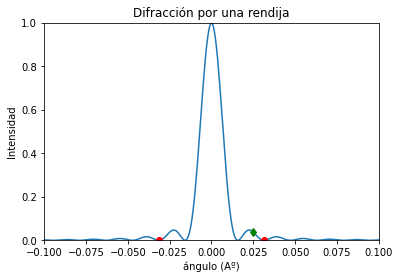

In [35]:
# Podemos representar simplemente creando los arrays dimensionales y cargando matplotlib
# x = linspace(-0.1,0.1,300)
# y = sinc(x)

# Creamos la figura
plt.figure()

#Representamos la gráfica
plt.plot(x,y)

# Representamos junto a la gráfica anterior la semilla (en verde) y los mínimos (en rojo) encontrados
#plt.plot(semilla,sinc(semilla),'gd')
#plt.plot(x_minimo_intensidad ,sinc(x_minimo_intensidad ),'ro')
#plt.plot(-x_minimo_intensidad ,sinc(x_minimo_intensidad ),'ro')

plt.plot(semilla,sinc(semilla),'gd',                             #la semilla (en verde)
         x_minimo_intensidad ,sinc(x_minimo_intensidad ),'ro',   # los mínimos (en rojo) encontrados
         -x_minimo_intensidad ,sinc(x_minimo_intensidad ),'ro')


# Añadimos etiquetas
plt.xlabel('ángulo (Aº)')
plt.ylabel('Intensidad')
plt.title('Difracción por una rendija')
plt.axis([-0.1,0.1,0,1])
plt.legend
plt.show()

## Encontrar mínimos en un intervalo definido

### scipy.optimize.fminbound
. scipy.optimize.fminbound (func, x1, x2, args = (), xtol = 1e-05, maxfun = 500, full_output = 0, disp = 1)  
. Minimización limitada para funciones escalares.

Otro camino para encontrar mínimos es mediante el uso de fminbound como vemos en este ejemplo. Sea la función

$$y = -cos\left(\frac{a\pi x}{b}\right)+cx^{d}$$

donde $a$, $b$, $c$, $d$ son coeficientes y $x$ es la variable. Para definirla en python vamos a crear una función cuyos argumentos sean estos parámetros.

In [36]:
#----------------------------------------------------------------------
# Ejemplo_scipy_minimizacion.py para aprender como encontrar minimos locales con python.
"""
Descripcion: Encuentra minimos locales de una funcion escalar en el intervalo (x1,x2 usando el metodo de Brent).
"""

# import scipy as sp                      # Importamos scipy como el alias sp
from scipy.optimize import fminbound    # Importamos fmindbound desde scipy.optimize    
# import matplotlib.pyplot as plt         # Importamos matplotlib.pyplot como el alias plt

def mi_funcion(x, a, b, c, d):
    """
    * Descripcion: Funcion y = -cos(a*pi*x/b) + c*x*d
    - x = variable.
    - a, b, c, d = Coeficientes de la funcion.
    * Salidas:
    - y = -sp.cos(a*sp.pi*x/b) + c*x**d 
    """
    y = -np.cos(a*np.pi*x/b) + c*x**d
    return  y

In [37]:
# x = sp.arange(0,1,.01)
# print(mi_funcion(x, a = 1, b = 0.5, c = 0.2, d = 2))

In [48]:
# Definimos los coeficientes a, b, c, d
a = 2
b = 0.5
c = 0.05
d = 2

# Definimos el intervalo de busqueda
x1 = -0.2
x2 = 0.2

# Creamos el array dimensional
x = np.arange(x1 - 1 , x2 + 1 ,.01)

# Evaluamos x en la funcion definida
y = mi_funcion(x, a, b, c, d)

# Calculamos del minimo local de la funcion entre x1 y x2 
x_minimo = fminbound(mi_funcion,x1,x2, args = (a,b,c,d))

El minimo esta en x = 0.000, y = -1.000


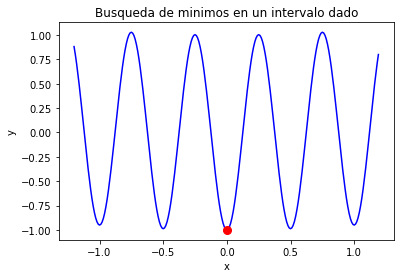

In [49]:
# Presentamos en pantalla el resultado
print ('El minimo esta en x = %2.3f, y = %2.3f' %(x_minimo, mi_funcion(x_minimo, a, b, c, d)))

# Creamos la figura
plt.figure

# Dibujamos en azul, "b" y con "-"
plt.plot(x,y,'b-')

# Dibujamos el minimo encontrado en nuestro intervalo 
plt.plot(x_minimo, mi_funcion(x_minimo,a, b, c, d),'ro', markersize = 8)

# Anadimos etiquetas
plt.title(u'Busqueda de minimos en un intervalo dado')
plt.xlabel('x')
plt.ylabel('y')

# Mostramos en pantalla
plt.show()

## Búsqueda de raíces de ecuaciones no lineales con SciPy

### El método de Brent
El método de Brent es un algoritmo de búsqueda de raíz que combina el método de bisección, el método de la secante y la interpolación cuadrática inversa. Este método es perteneciente a los métodos abiertos, gracias a Theodorus Dekker y Richard Brent.

In [40]:
# import numpy as np

# import matplotlib.pyplot as plt

Visto cómo resolver sistemas de ecuaciones lineales, tal vez sea incluso más atractivo resolver ecuaciones no lineales. Para ello, importaremos el paquete `optimize` de SciPy:

In [50]:
from scipy import optimize

La ayuda de este paquete es bastante larga (puedes consultarla también en http://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html).  
El paquete optimize incluye multitud de métodos para optimización, ajuste de curvas y búsqueda de raíces. Vamos a centrarnos ahora en la búsqueda de raíces de funciones escalares.  
Para más información puedes leer http://pybonacci.org/2012/10/25/como-resolver-ecuaciones-algebraicas-en-python-con-scipy/

<div class="alert alert-info"> <bd> Nota </bd> : La función `root` se utiliza para hallar soluciones de *sistemas* de ecuaciones no lineales así que obviamente también funciona para ecuaciones escalares. No obstante, vamos a utilizar las funciones `brentq` y `newton` para que el método utilizado quede más claro. </div>

Hay básicamente dos tipos de algoritmos para hallar raíces de ecuaciones no lineales:

- Aquellos que operan en un intervalo [a,b] tal que f(a)⋅f(b) < 0. Más lentos, convergencia asegurada.
- Aquellos que operan dando una condición inicial aproximadamente cerca de la solución. Más rápidos, convergencia condicionada.

De los primeros vamos a usar la función brentq (aunque podríamos usar bisect) y de los segundos vamos a usar newton (que en realidad engloba los métodos de Newton y de la secante).

**Ejemplo**:

$\ln{x} = \sin{x} \Rightarrow F(x) \equiv \ln{x} - \sin{x} = 0$

Lo primero que tengo que hacer es definir la ecuación, que matemáticamente será una función $F(x)$ que quiero igualar a cero.

In [42]:
def F(x):
    return np.log(x) - np.sin(x)

def S(x):
    return np.sin(x)

def L(x):
    return np.log(x)

Para hacernos una idea de las posibles soluciones siempre podemos representar gráficamente esa función:

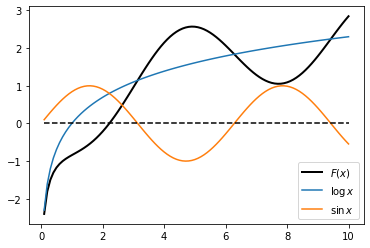

In [43]:
x = np.linspace(0.1, 10, num=100)

plt.plot(x, F(x), 'k', lw=2, label="$F(x)$")

plt.plot(x, L(x), label="$\log{x}$")

plt.plot(x, S(x), label="$\sin{x}$")

plt.plot(x, np.zeros_like(x), 'k--')

plt.legend(loc=4)

Y utilizando por ejemplo el método de Brent en el intervalo [0,3]:

In [51]:
res = optimize.brentq(F, 0.0001, 3)
print(res)

2.219107148913746


In [52]:
res = optimize.brentq(F, 0.2, 3)
print(res)

2.219107148913746
